In [1]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, precision_score, recall_score,f1_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Using Keras to Load the Dataset


cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
X_train_full.shape




(50000, 32, 32, 3)

In [5]:
y_train_full.shape

(50000, 1)

In [6]:
X_train_full.dtype


dtype('uint8')

In [7]:
y_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

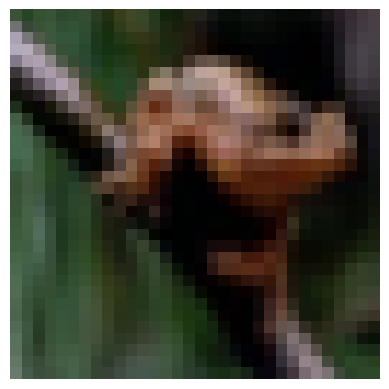

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([[6],
       [7],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
class_names = ["airplane", "automobile", "bird", "cat",
               "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
X_valid.shape

(5000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
#Image Classification Model using Sequential API
import numpy as np

model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=(32,32,3)))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


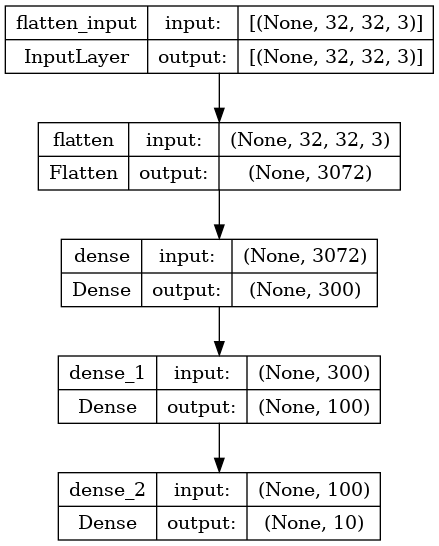

In [18]:
keras.utils.plot_model(model1, "my_cifar10.png", show_shapes=True)

In [19]:
hidden1 = model1.layers[1]
hidden1.name

'dense'

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
#Compiling the Image Classification Model

model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
history = model1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1407/1407 [==============================] - 8s 3ms/step - loss: 1.8803 - accuracy: 0.3260 - val_loss: 1.8917 - val_accuracy: 0.3230
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7000 - accuracy: 0.3977 - val_loss: 1.9933 - val_accuracy: 0.2984
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6196 - accuracy: 0.4277 - val_loss: 1.9136 - val_accuracy: 0.3124
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5656 - accuracy: 0.4449 - val_loss: 1.8903 - val_accuracy: 0.3490
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5242 - accuracy: 0.4582 - val_loss: 1.6224 - val_accuracy: 0.4148
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4880 - accuracy: 0.4719 - val_loss: 1.5743 - val_accuracy: 0.4382
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4534 - accuracy: 0.4848 - val_loss: 1.5489 - val_accuracy:

In [27]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 4.2721 - accuracy: 0.2036


[4.272080421447754, 0.20360000431537628]

In [43]:
model1.save("model1.keras")

In [24]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
model2.evaluate(X_test,y_test)

Epoch 1/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9051 - accuracy: 0.3143 - val_loss: 1.9098 - val_accuracy: 0.3044
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7269 - accuracy: 0.3873 - val_loss: 1.8541 - val_accuracy: 0.3182
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6450 - accuracy: 0.4166 - val_loss: 1.9222 - val_accuracy: 0.3074
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5890 - accuracy: 0.4344 - val_loss: 1.9136 - val_accuracy: 0.3498
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5479 - accuracy: 0.4504 - val_loss: 1.6060 - val_accuracy: 0.4222
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5084 - accuracy: 0.4654 - val_loss: 1.6884 - val_accuracy: 0.4028
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4765 - accuracy: 0.4774 - val_loss: 1.6072 - val_accuracy:

[4.102339267730713, 0.19499999284744263]

In [26]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 4.1023 - accuracy: 0.1950


[4.102339267730713, 0.19499999284744263]

In [44]:
model2.save("model2.keras")

In [28]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model3.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
model3.evaluate(X_test,y_test)

Epoch 1/30
1407/1407 [==============================] - 6s 3ms/step - loss: 1.8873 - accuracy: 0.3155 - val_loss: 1.7690 - val_accuracy: 0.3670
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7228 - accuracy: 0.3809 - val_loss: 1.6724 - val_accuracy: 0.3886
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6568 - accuracy: 0.4047 - val_loss: 1.6200 - val_accuracy: 0.4150
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6135 - accuracy: 0.4214 - val_loss: 1.6501 - val_accuracy: 0.4100
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5782 - accuracy: 0.4333 - val_loss: 1.6444 - val_accuracy: 0.4084
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5533 - accuracy: 0.4435 - val_loss: 1.5810 - val_accuracy: 0.4288
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5394 - accuracy: 0.4490 - val_loss: 1.5528 - val_accuracy:

[1.5061237812042236, 0.4700999855995178]

In [29]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5061 - accuracy: 0.4701


[1.5061237812042236, 0.4700999855995178]

In [45]:
model3.save("model3.keras")

In [30]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model4.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
model4.evaluate(X_test,y_test)

Epoch 1/30
1407/1407 [==============================] - 6s 3ms/step - loss: 1.8683 - accuracy: 0.3269 - val_loss: 1.7182 - val_accuracy: 0.3834
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6888 - accuracy: 0.3949 - val_loss: 1.6695 - val_accuracy: 0.3874
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6077 - accuracy: 0.4235 - val_loss: 1.5891 - val_accuracy: 0.4350
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5622 - accuracy: 0.4387 - val_loss: 1.6312 - val_accuracy: 0.4270
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5233 - accuracy: 0.4562 - val_loss: 1.5891 - val_accuracy: 0.4330
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4942 - accuracy: 0.4650 - val_loss: 1.5021 - val_accuracy: 0.4636
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4698 - accuracy: 0.4750 - val_loss: 1.5085 - val_accuracy:

[1.454054832458496, 0.49459999799728394]

In [46]:
model4.save("model4.keras")

In [31]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model5.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9157 - accuracy: 0.3065 - val_loss: 1.8992 - val_accuracy: 0.3032
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7235 - accuracy: 0.3846 - val_loss: 2.0024 - val_accuracy: 0.2914
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6411 - accuracy: 0.4144 - val_loss: 1.9980 - val_accuracy: 0.2948
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5823 - accuracy: 0.4364 - val_loss: 1.9272 - val_accuracy: 0.3368
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5383 - accuracy: 0.4509 - val_loss: 1.6391 - val_accuracy: 0.4104
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5000 - accuracy: 0.4672 - val_loss: 1.6605 - val_accuracy: 0.4062
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4667 - accuracy: 0.4780 - val_loss: 1.6354 - val_accuracy:

In [32]:
model5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.4174 - accuracy: 0.3468


[2.4174485206604004, 0.3467999994754791]

In [47]:
model5.save("model5.keras")

In [33]:
#Use the Model to Make Predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 119ms/step


array([[0.08, 0.26, 0.05, 0.1 , 0.03, 0.16, 0.08, 0.06, 0.07, 0.12],
       [0.19, 0.16, 0.08, 0.08, 0.02, 0.14, 0.06, 0.03, 0.11, 0.14],
       [0.09, 0.24, 0.06, 0.11, 0.03, 0.14, 0.08, 0.04, 0.11, 0.1 ]],
      dtype=float32)

In [1]:
# # y_pred = model.predict_classes(X_new)
# y_pred = (model.predict(X_test) > 0.5).astype("int32")
# y_pred

In [2]:
# np.array(class_names)[y_pred]

In [36]:
y_test.shape

(10000, 1)

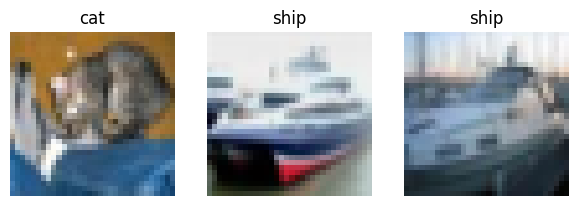

In [37]:
y_new = y_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('cifar10', tight_layout=False)
plt.show()

In [39]:
number_of_models=5

In [49]:
from tensorflow.keras.models  import load_model
model_list=[]
for i in range(1,number_of_models+1):
    model_list.append(load_model(f"model{i}.keras"))

In [50]:
y_predictions=[]
for i in range(0,number_of_models):
    y_predictions.append(model_list[i].predict(X_test))

313/313 [==============================] - 1s 1ms/step


In [52]:
def y_pred_classes(y_pred):
    y_pred_classes_ = np.array([np.argmax(element) for element in y_pred])
    return y_pred_classes_


In [53]:
y_predictions_classes=y_predictions
for i in range(0,number_of_models):
    y_predictions_classes[i]=y_pred_classes(y_predictions[i])

In [54]:
y_predictions_classes

[array([1, 9, 1, ..., 2, 1, 1]),
 array([1, 1, 1, ..., 2, 1, 1]),
 array([3, 9, 8, ..., 3, 5, 7]),
 array([5, 8, 1, ..., 2, 6, 7]),
 array([1, 1, 1, ..., 3, 1, 9])]

In [61]:
import seaborn as sns

def plot_CM(y_pred_classes,i):
    cm = confusion_matrix(y_test,y_pred_classes)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix using ANN')
    plt.savefig(f"CM{i}.jpg")
    plt.show()

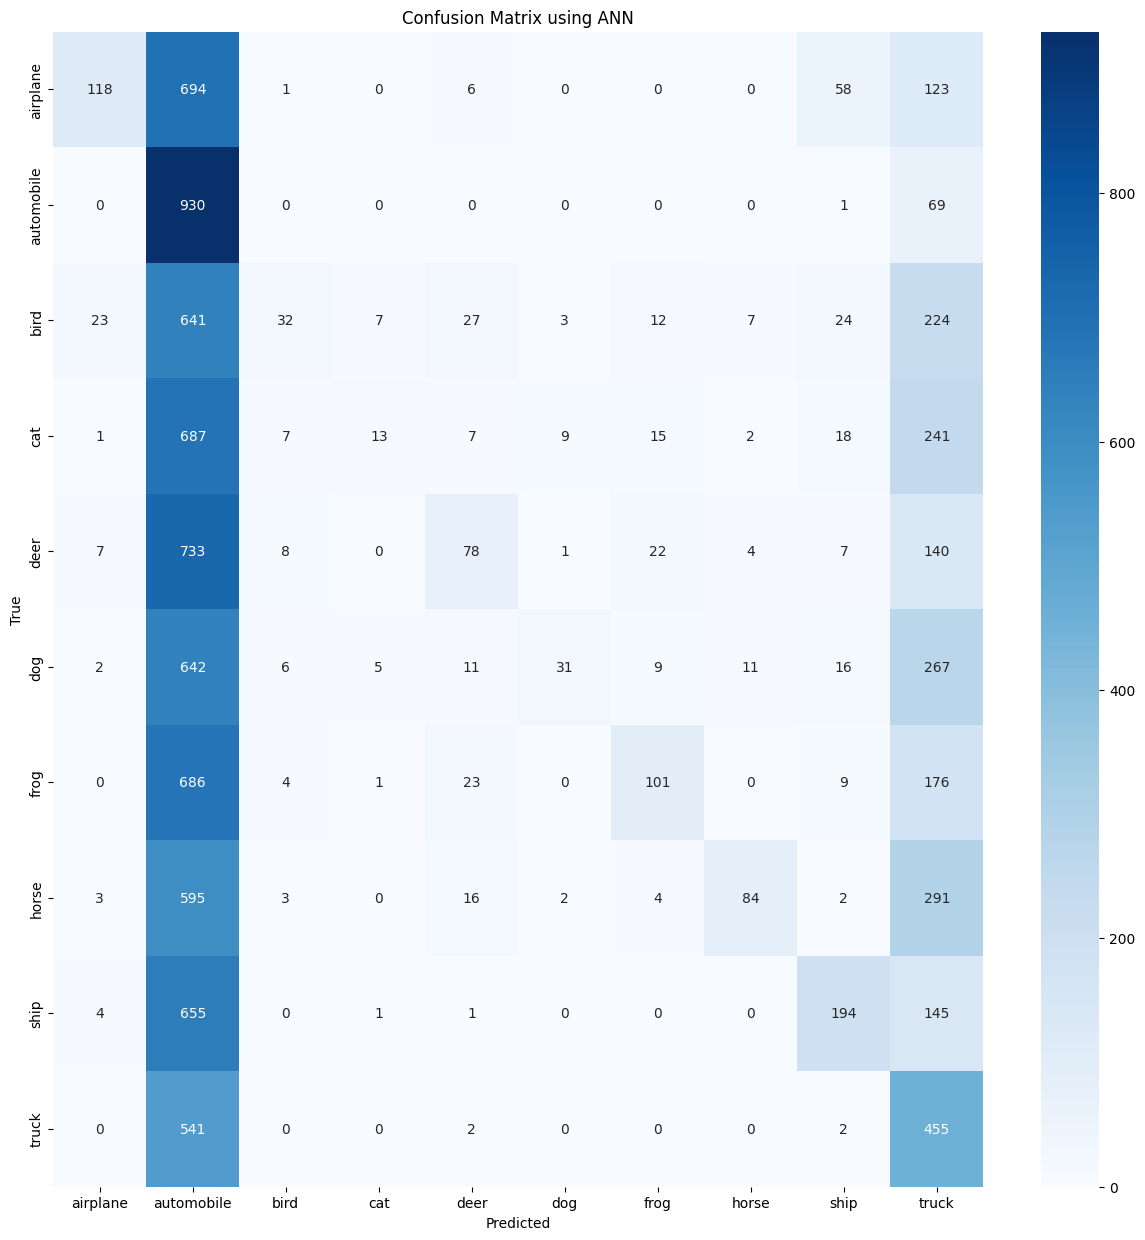

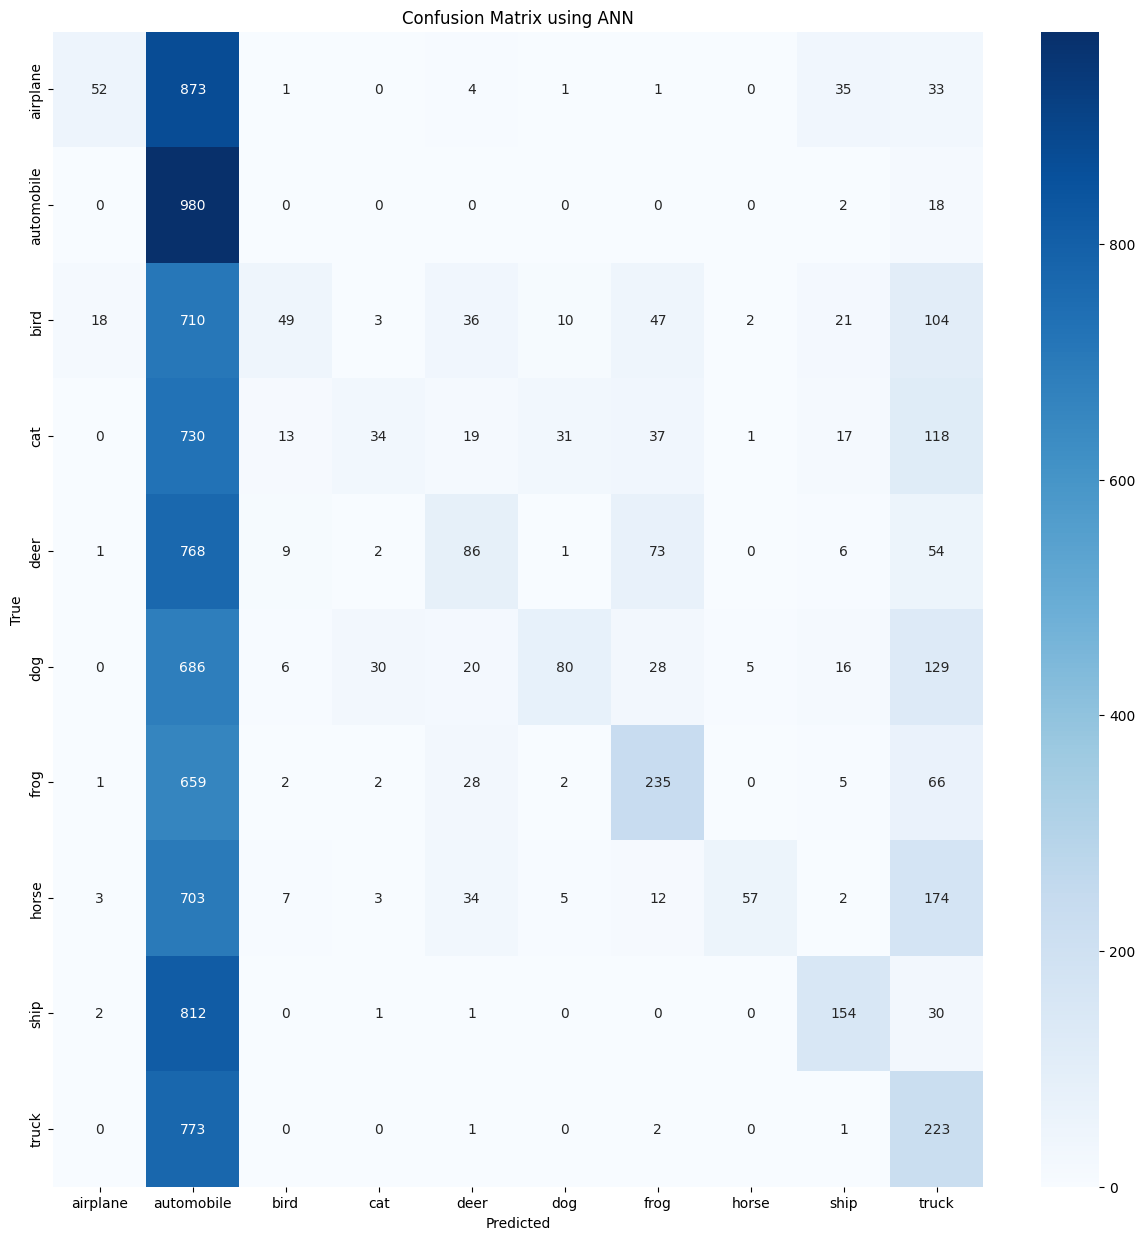

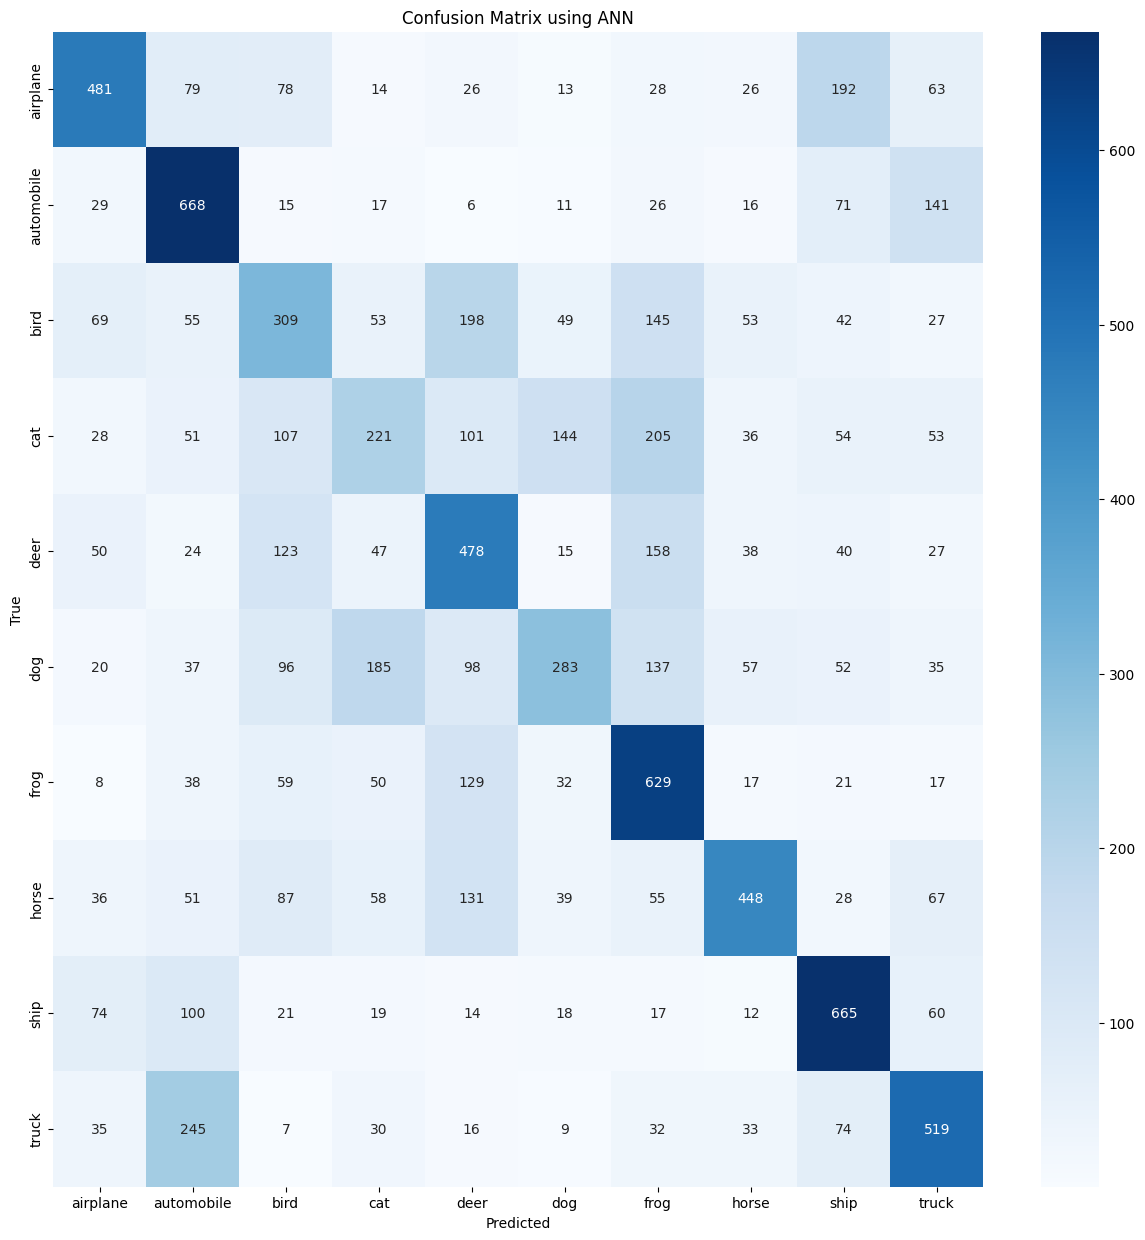

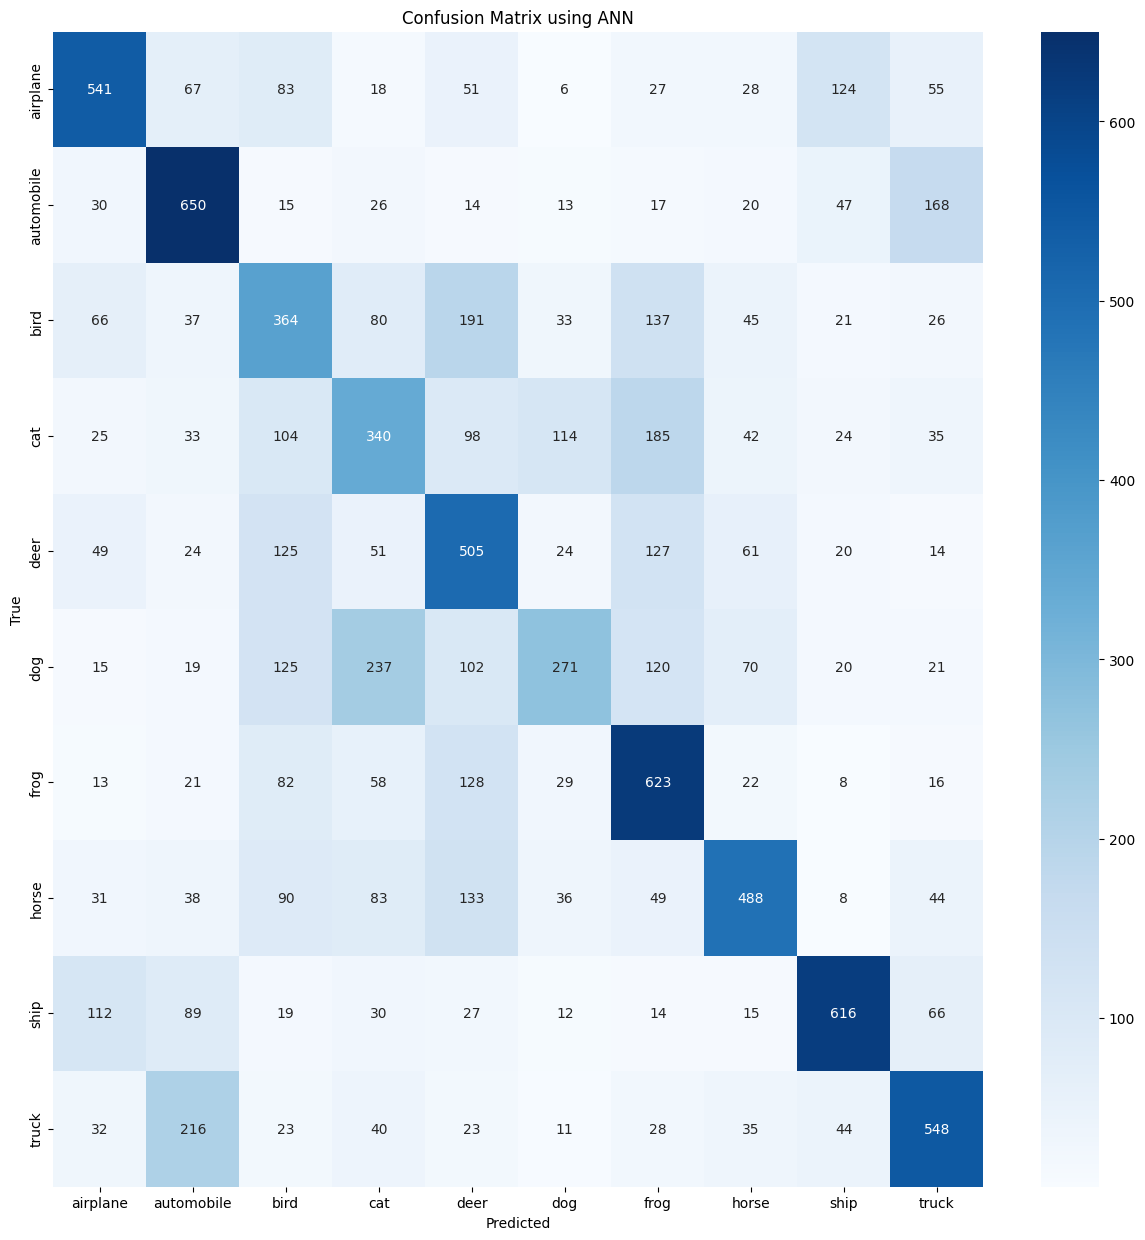

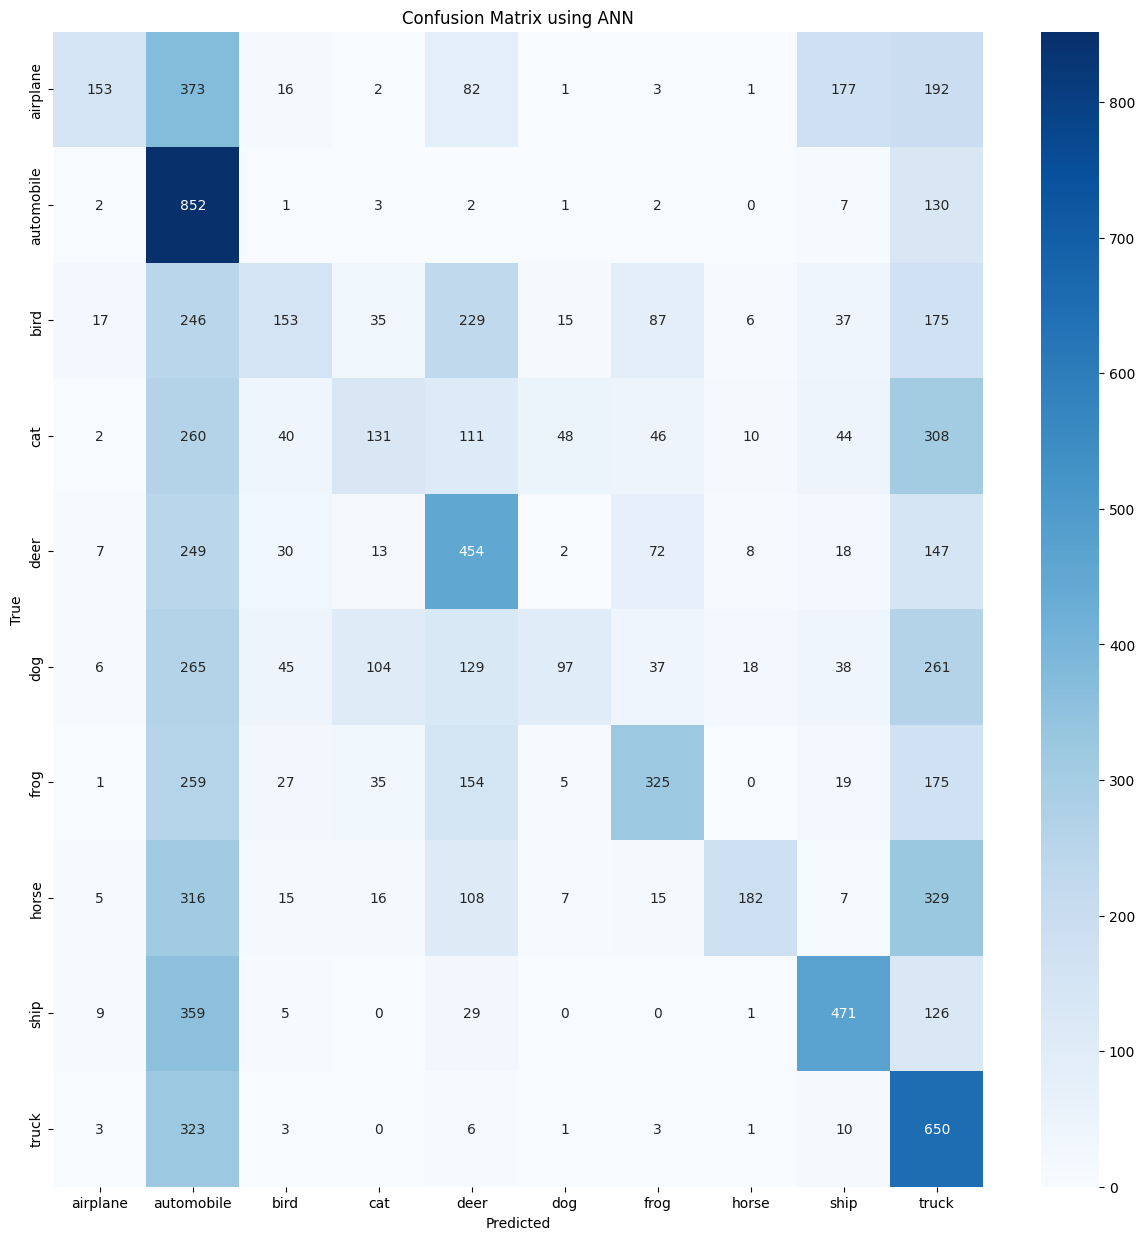

In [62]:
for i in range(number_of_models):
    plot_CM(y_predictions_classes[i],i+1)

In [64]:
Accuracy=[]
Precision_weighted=[]
Precision_macro=[]
Precision=[]
Recall_Score=[]
Recall_Score_macro=[]
Recall_Score_weighted=[]
F1_Score=[]
Classificaion_Reports= []

for i in range(number_of_models):
    Precision_macro.append(precision_score(y_test,y_predictions_classes[i],average='macro'))
    Precision_weighted.append(precision_score(y_test,y_predictions_classes[i],average='weighted'))
    Precision.append(precision_score(y_test,y_predictions_classes[i],average=None))
        
    Recall_Score_macro.append(recall_score(y_test,y_predictions_classes[i],average='macro'))
    Recall_Score_weighted.append(recall_score(y_test,y_predictions_classes[i],average='weighted'))
    Recall_Score.append(recall_score(y_test,y_predictions_classes[i],average=None))

    Accuracy.append(accuracy_score(y_test,y_predictions_classes[i]))
    Classificaion_Reports.append(classification_report(y_test,y_predictions_classes[i],target_names=class_names))
    F1_Score.append(f1_score(y_test,y_predictions_classes[i],average='macro'))


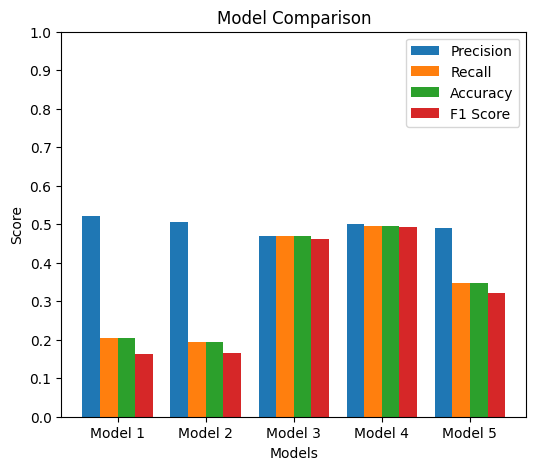

In [66]:
plt.figure(figsize=(6,5))
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
model_numbers = np.arange(number_of_models)
wid=.2
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.ylim(0,1)



bar1=plt.bar(model_numbers,Precision_macro,width=wid,label='Precision')
bar2=plt.bar(model_numbers+wid,Recall_Score_macro,width=wid,label='Recall')
bar3=plt.bar(model_numbers+2*wid,Accuracy,width=wid,label='Accuracy')
bar4=plt.bar(model_numbers+3*wid,F1_Score,width=wid,label='F1')




plt.yticks(np.linspace(0,1,11))
plt.xticks(model_numbers+ 1.5*wid,model_names) 
plt.legend( (bar1, bar2, bar3,bar4), ('Precision', 'Recall', 'Accuracy','F1 Score') ) 

plt.show()
